<a href="https://colab.research.google.com/github/garavellimafe/Solu-es-CP2/blob/main/Solu%C3%A7%C3%B5es_CP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Conjunto de Exerc√≠cios 1**

### **Parte 1**

In [ ]:
import pandas as pd

# Carregando o dataset
df = pd.read_csv('/content/energydata_complete.csv')

# Visualizar as primeiras linhas
print(df.head())

# Verificar colunas n√£o num√©ricas (como 'date')
print("Colunas n√£o num√©ricas:", df.select_dtypes(exclude=['number']).columns)

# Remover a coluna de data (se n√£o for usada como vari√°vel)
df = df.drop('date', axis=1)

# Preencher valores ausentes nas colunas num√©ricas com a m√©dia
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

# Verificar se ainda h√° valores ausentes
print("Valores ausentes restantes:\n", df.isnull().sum().sum())




                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility

In [ ]:
# Separar as vari√°veis
X = df.drop(['Appliances'], axis=1)  # Exclui a coluna de consumo de energia (target)
y = df['Appliances']  # A coluna que cont√©m o consumo de energia


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Criando e treinando o modelo de regress√£o linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo previs√µes no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Corrigido aqui
r2 = r2_score(y_test, y_pred)

# Exibindo os resultados
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R¬≤: {r2:.4f}')


MAE: 52.55
RMSE: 91.17
R¬≤: 0.1693


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Criar e treinar o modelo
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Previs√µes
y_pred_tree = tree_model.predict(X_test)

# M√©tricas
mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
r2_tree = r2_score(y_test, y_pred_tree)

print(f'√Årvore de Regress√£o -> MAE: {mae_tree:.2f}, RMSE: {rmse_tree:.2f}, R¬≤: {r2_tree:.4f}')


√Årvore de Regress√£o -> MAE: 38.87, RMSE: 90.60, R¬≤: 0.1798


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Criar e treinar o modelo
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Previs√µes
y_pred_rf = rf_model.predict(X_test)

# M√©tricas
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest -> MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R¬≤: {r2_rf:.4f}')


Random Forest -> MAE: 32.90, RMSE: 68.42, R¬≤: 0.5322


In [ ]:
# Compara√ß√£o dos resultados
resultados = pd.DataFrame({
    'Modelo': ['Regress√£o Linear', '√Årvore de Regress√£o', 'Random Forest'],
    'MAE': [mae, mae_tree, mae_rf],
    'RMSE': [rmse, rmse_tree, rmse_rf],
    'R¬≤': [r2, r2_tree, r2_rf]
})

print(resultados)


                Modelo        MAE       RMSE        R¬≤
0     Regress√£o Linear  52.547693  91.174826  0.169304
1  √Årvore de Regress√£o  38.872561  90.596509  0.179809
2        Random Forest  32.900228  68.417501  0.532236


### **Conclus√£o:**

Com base nas m√©tricas:

MAE (erro m√©dio absoluto) ‚Äî quanto menor, melhor.

RMSE ‚Äî penaliza erros grandes, tamb√©m deve ser o menor poss√≠vel.

R¬≤ ‚Äî quanto mais pr√≥ximo de 1, melhor (indica o quanto o modelo explica a variabilidade dos dados).

Voc√™ pode ent√£o discutir:

Qual modelo teve melhor desempenho?

Houve overfitting (ex: √Årvore com R¬≤ muito alto no treino mas baixo no teste)?

O Random Forest costuma ser o mais robusto nesse tipo de dado.

### **Parte 2**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados (fa√ßa upload do arquivo no Colab e ajuste o caminho, se necess√°rio)
df = pd.read_csv('/content/smart_grid_stability_augmented.csv')

# Visualizar as primeiras linhas do dataset
print(df.head())


       tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab     stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable  


In [ ]:
# Nome da coluna alvo (mude se for diferente)
target_col = 'stabf'

# Separar features (X) e target (y)
X = df.drop(target_col, axis=1)
y = df[target_col]

# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Tamanho do conjunto de treino: {X_train.shape[0]}')
print(f'Tamanho do conjunto de teste: {X_test.shape[0]}')


Tamanho do conjunto de treino: 48000
Tamanho do conjunto de teste: 12000



Matriz de Confus√£o - √Årvore de Decis√£o:


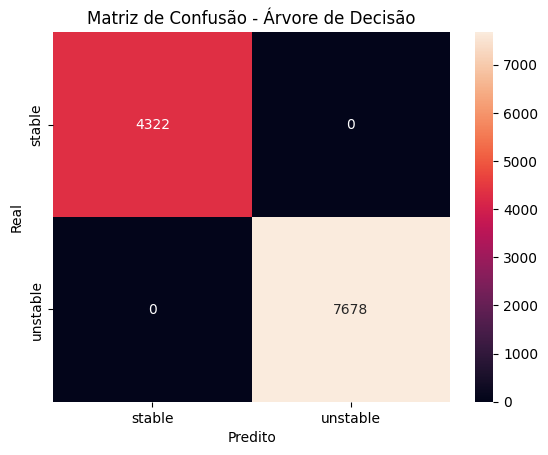


Matriz de Confus√£o - KNN:


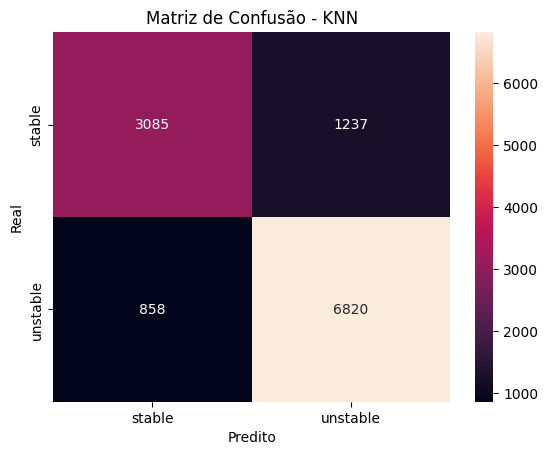


Matriz de Confus√£o - Regress√£o Log√≠stica:


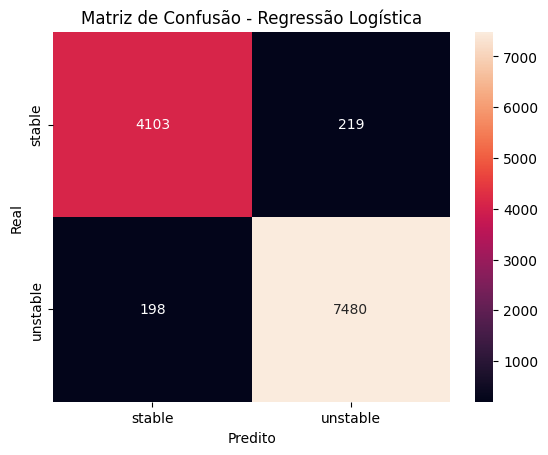

In [ ]:
# Inicializar os modelos
models = {
    '√Årvore de Decis√£o': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Regress√£o Log√≠stica': LogisticRegression(max_iter=1000)
}

# Dicion√°rio para armazenar m√©tricas
results = {'Modelo': [], 'Acur√°cia': [], 'F1-Score': []}

# Loop para treinar, prever e avaliar cada modelo
for name, model in models.items():
    # Treinar modelo
    model.fit(X_train, y_train)

    # Fazer previs√µes no conjunto de teste
    y_pred = model.predict(X_test)

    # Calcular m√©tricas
    acc = accuracy_score(y_test, y_pred)

    # Calcular F1-score (tenta usar 'stable' como classe positiva, sen√£o calcula normalmente)
    try:
        f1 = f1_score(y_test, y_pred, pos_label='stable')
    except:
        f1 = f1_score(y_test, y_pred)

    # Armazenar resultados
    results['Modelo'].append(name)
    results['Acur√°cia'].append(acc)
    results['F1-Score'].append(f1)

    # Plotar matriz de confus√£o
    labels = sorted(y.unique())
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    print(f'\nMatriz de Confus√£o - {name}:')
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confus√£o - {name}')
    plt.show()


In [ ]:
# Mostrar os resultados em formato de tabela
results_df = pd.DataFrame(results)
print(results_df)


                Modelo  Acur√°cia  F1-Score
0    √Årvore de Decis√£o  1.000000  1.000000
1                  KNN  0.825417  0.746521
2  Regress√£o Log√≠stica  0.965250  0.951641


# **Conjunto de exerc√≠cios 2**

### **Parte 1**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar dados
df = pd.read_csv('/content/SolarPrediction.csv')

# Mostrar primeiras linhas
print(df.head())


     UNIXTime                   Data      Time  Radiation  Temperature  \
0  1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1  1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2  1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3  1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4  1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   

   Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  
0     30.46        59                  177.39   5.62    06:13:00   18:13:00  
1     30.46        58                  176.78   3.37    06:13:00   18:13:00  
2     30.46        57                  158.75   3.37    06:13:00   18:13:00  
3     30.46        60                  137.71   3.37    06:13:00   18:13:00  
4     30.46        62                  104.95   5.62    06:13:00   18:13:00  


In [ ]:
# Converter coluna de data/hora para datetime (se existir, sen√£o ignore)
if 'UNIXTime' in df.columns:
    df['Date'] = pd.to_datetime(df['UNIXTime'], unit='s')
elif 'Data' in df.columns:
    df['Date'] = pd.to_datetime(df['Data'], errors='coerce')

# Criar vari√°vel-alvo bin√°ria:
# 'Alta Radia√ß√£o' se a radia√ß√£o solar for maior que a mediana, 'Baixa Radia√ß√£o' caso contr√°rio
mediana = df['Radiation'].median()
df['Radiation_Level'] = df['Radiation'].apply(lambda x: 'Alta' if x > mediana else 'Baixa')

# Selecionar colunas de atributos (excluindo colunas n√£o num√©ricas e target)
X = df.select_dtypes(include=['float64', 'int64']).drop(['Radiation'], axis=1)
y = df['Radiation_Level']

# Dividir em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar atributos cont√≠nuos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



Matriz de Confus√£o - √Årvore de Decis√£o:


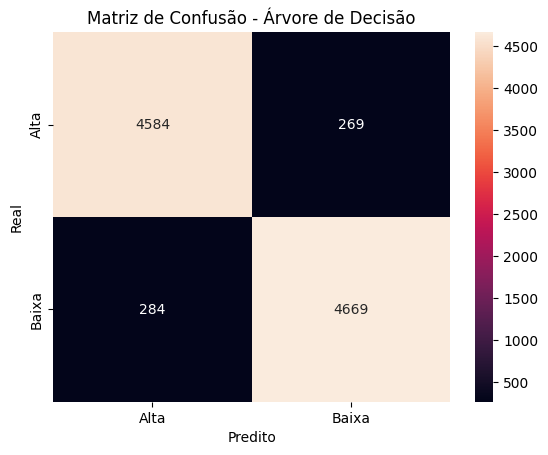


Matriz de Confus√£o - Random Forest:


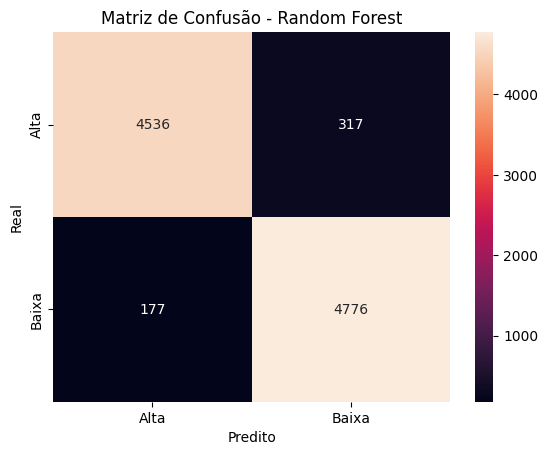


Matriz de Confus√£o - SVM:


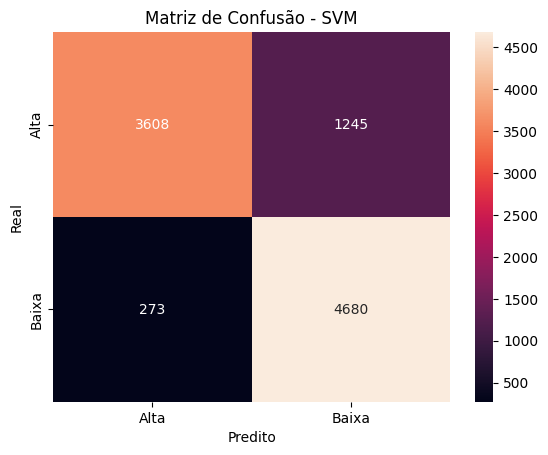

              Modelo  Acur√°cia
0  √Årvore de Decis√£o  0.943606
1      Random Forest  0.949623
2                SVM  0.845197


In [ ]:
# Inicializar os modelos
models = {
    '√Årvore de Decis√£o': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

results = {'Modelo': [], 'Acur√°cia': []}

for name, model in models.items():
    # Treinar
    model.fit(X_train, y_train)

    # Prever
    y_pred = model.predict(X_test)

    # Avaliar
    acc = accuracy_score(y_test, y_pred)
    results['Modelo'].append(name)
    results['Acur√°cia'].append(acc)

    # Matriz de confus√£o
    cm = confusion_matrix(y_test, y_pred, labels=['Alta', 'Baixa'])
    print(f'\nMatriz de Confus√£o - {name}:')
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Alta', 'Baixa'], yticklabels=['Alta', 'Baixa'])
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confus√£o - {name}')
    plt.show()

# Mostrar tabela comparativa
results_df = pd.DataFrame(results)
print(results_df)


### **Parte 2**

In [ ]:
# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Ler o arquivo CSV (certifique-se de que T1.csv est√° no mesmo diret√≥rio)
df = pd.read_csv("T1.csv")

# Exibir pr√©via dos dados
print("Pr√©via dos dados:")
display(df.head())

# Mostrar informa√ß√µes gerais (nomes das colunas, tipos, valores nulos)
print("\nInforma√ß√µes do dataset:")
print(df.info())


Pr√©via dos dados:


Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0  01 01 2018 00:00           380.047791          5.311336   
1  01 01 2018 00:10           453.769196          5.672167   
2  01 01 2018 00:20           306.376587          5.216037   
3  01 01 2018 00:30           419.645905          5.659674   
4  01 01 2018 00:40           380.650696          5.577941   

   Theoretical_Power_Curve (KWh)  Wind Direction (¬∞)  
0                     416.328908          259.994904  
1                     519.917511          268.641113  
2                     390.900016          272.564789  
3                     516.127569          271.258087  
4                     491.702972          265.674286


Informa√ß√µes do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (¬∞)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB
None


In [ ]:
# Remover linhas com valores ausentes
df = df.dropna()

# Verifique os nomes das colunas:
print("\nColunas dispon√≠veis:")
print(df.columns)

# ‚ö†Ô∏è Ajuste o nome da vari√°vel-alvo conforme o seu dataset
# Exemplo (dataset do Kaggle): 'LV ActivePower (kW)'
y = df['LV ActivePower (kW)']

# X s√£o todas as outras colunas (features)
X = df.drop(columns=['LV ActivePower (kW)'])



Colunas dispon√≠veis:
Index(['Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (¬∞)'],
      dtype='object')


In [ ]:
# Separar dados em treino e teste (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Tamanho dos conjuntos:")
print("Treino:", X_train.shape)
print("Teste:", X_test.shape)


Tamanho dos conjuntos:
Treino: (40424, 4)
Teste: (10106, 4)


In [ ]:
# üîπ Garantir que s√≥ h√° colunas num√©ricas antes da normaliza√ß√£o
X_train = X_train.select_dtypes(include=['int64', 'float64'])
X_test = X_test.select_dtypes(include=['int64', 'float64'])

# üîπ Normalizar (padronizar) os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# üîπ Criar dicion√°rio de modelos
models = {
    'Regress√£o Linear': LinearRegression(),
    '√Årvore de Regress√£o': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# üîπ Dicion√°rio para armazenar resultados
results = {}

# üîπ Treinar e avaliar cada modelo
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Calcular m√©tricas
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Armazenar resultados
    results[name] = {'RMSE': rmse, 'R¬≤': r2}

    # Exibir resultados individuais
    print("="*50)
    print(f"Modelo: {name}")
    print(f"‚û°Ô∏è RMSE: {rmse:.2f}")
    print(f"‚û°Ô∏è R¬≤: {r2:.3f}")

# üîπ Comparativo final dos modelos
results_df = pd.DataFrame(results).T
print("\nüìä Comparativo de Desempenho:")
display(results_df)



Modelo: Regress√£o Linear
‚û°Ô∏è RMSE: 411.71
‚û°Ô∏è R¬≤: 0.901
Modelo: √Årvore de Regress√£o
‚û°Ô∏è RMSE: 538.79
‚û°Ô∏è R¬≤: 0.830
Modelo: Random Forest
‚û°Ô∏è RMSE: 412.82
‚û°Ô∏è R¬≤: 0.900

üìä Comparativo de Desempenho:


RMSE        R¬≤
Regress√£o Linear     411.710022  0.900660
√Årvore de Regress√£o  538.790375  0.829870
Random Forest        412.822145  0.900123